In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Contents

1. [Simple Linear Regression](#Simple-Linear-Regression)
2. [Multiple Linear Regression](#Multiple-Linear-Regression)
3. [Other Considerations in the Regression Model](#Other-Considerations-in-the-Regression-Model)
4. [Comparison of Linear Regression with K-Nearest Neighbors](#Comparison-of-Linear-Regression-with-K-Nearest-Neighbors)

---

## Linear Regression

Linear Regression can be used to answer several questions that would be useful in making some prediction about the data.

1. Is there a relationship between advertising budget and sales?
2. How strong is the relationship between advertising budget and sales?
3. Which media contribute to sales?
4. How accurately can we estimate the effect of each medium on sales?
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy among the advertising media?

---

# Simple Linear Regression

We assume that there is approximately a linear relationship between X and Y.

\begin{equation}\label{3.1}
    Y \approx \beta_0 + \beta_1 X,
    \tag{3.1}
\end{equation}
    where $\beta_0$ and $\beta_1$ are intercept and slope terms in the linear model. 

Once we have used our training model to produce estimates $\beta_0$ and $\beta_1$ for the model coefficients, we can predict future sales on the basis of a particular value of response variable by computing

\begin{equation}\label{3.2}
    \hat{y} = \hat{\beta_0} + \hat{\beta_1}x,
    \tag{3.2}
\end{equation}
    where $\hat{y}$ indicates a prediction of $Y$ on the basis of $X = x$

## Estimating the Coefficients
Our goal is to obtain coefficient estimates $\beta_0$ and $\beta_1$ such that the linear model (equation \ref{3.1}) fits the available data well &mdash; that is so that $y_i \approx \hat{\beta}_0 + \hat{\beta}_1x_i$ for $i = 1,...,n$. In other words, we want our resulting line as close as possible to the $n$ data points.

The most common approach involes minimizing the *least squares*.

Let $e_i = y_i - \hat{y}_i$ represent the $i^{th}$ *residual*.  
This is the difference between the $i^{th}$ observed response value and the $i^{th}$ response value that is predicted by our linear model

We define the *residual sum of squares* (RSS) as  
&nbsp; $\text{RSS} = e_{1}^2 + e_{2}^2 + ... + e_{n}^2$,  
or equivalently

\begin{equation}\label{3.3}
    \text{RSS} = (y_1 - \hat{\beta}_0 - \hat{\beta}_1x_1)^2 + (y_2 - \hat{\beta}_0 - \hat{\beta}_1x_2)^2 + ... + (y_n - \hat{\beta}_0 - \hat{\beta}_1x_n)^2
    \tag{3.3}
\end{equation}

The least squares approach chooses $\beta_0$ and $\beta_1$ to minimize the \text{RSS}. Using some calculus, one can show that the minimizers are

\begin{equation}\label{3.4}
    \hat{\beta}_1 = \frac{\sum^n_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum^n_{i=1}(x_i - \bar{x})^2} ,\\
    \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x} ,
    \tag{3.4}
\end{equation}
where $\bar{y}$ and $\bar{x}$ are the sample means.

## Assessing the Accuracy of the Coefficient Estimates
If the function for $Y$ is to be approximated by a linear function, then the relationship in (equation 2.1) can be rewritten as:

\begin{equation}\label{3.5}
    Y = \beta_0 + \beta_1X + \epsilon
    \tag{3.5}
\end{equation}

This model defines the *population regression line*, which is the best linear approximation to the true relationship between $X$ and $Y$. The least squares regression coefficient estimates (\ref{3.4}) characterize the *least squares line* (\ref{3.2}).

An analogy can be made between linear regression and estimation of the mean of a random variable on the basis of *bias*.

If we use the sample mean μ̂ to estimate μ, this estimate is *unbiased*, in the sense on average, we expect μ̂ to equal μ. μ̂ might overestimate μ on the basis of one particular data set, and underestimate μ on another set of observations. But you could imagine that on an increasingly large set of observations, then this average would *exactly* equal μ.

So how accurate is the sample mean μ̂ as an estimate of μ? In general we answer this question by computing the *standard error* of μ̂ written as $SE(\hat{\mu})$.

\begin{equation}\label{3.7}
    Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n}
    \tag{3.7}
\end{equation}
where $\sigma$ is the standard deviation of each of the realizations of $y_i$ of $Y$.

In a similar vein, we can wonder how close $\hat{\beta}_0$ and $\hat{\beta}_1$ are to the true values $\beta_0$ and $\beta_1$. To compute the standard errors associated with $\hat{\beta}_0$ and $\hat{\beta}_1$, we use the following formulas:

\begin{equation*}
\label{3.8}
    SE(\hat{\beta}_0)^2 = \sigma^2 \left[ \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n(x_i - \bar{x})^2} \right] ,
    \; SE(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n(x_i - \bar{x})^2}
    \tag{3.8}
\end{equation*}


where $\sigma^2 = Var(\epsilon)$

In general, $\sigma^2$ is not known, but can be estimated from the data. The estimate of $\sigma$ is known as the *residual standard error*, and is given by the formula $\text{RSE} = \sqrt{\text{RSS} / (n - 2)}$

Standard errors can be used to compute *confidence intervals*. For linear regression, the 95% confidence interval for $\beta_1$ approximately takes the form

\begin{equation}\label{3.9}
    \beta_1 \pm 2 \cdot SE(\hat{\beta}_1)
    \tag{3.9}
\end{equation}

That is, there is approximately a 95% chance that the interval

\begin{equation}\label{3.10}
    \left[ \beta_1 - 2 \cdot SE(\hat{\beta}_1) , \beta_1 + 2 \cdot SE(\hat{\beta}_1) \right]
    \tag{3.10}
\end{equation}

will contain the true value of $\beta_1$. Similarly, $\beta_0$

\begin{equation}\label{3.11}
    \beta_0 \pm 2 \cdot SE(\hat{\beta}_0)
    \tag{3.11}
\end{equation}

Standard errors can also be used to perform *hypothesis test* on the coefficients.

The Null Hypothesis:
\begin{equation}\label{3.12}
        H_0 : \text{There is no relationship between X and Y}
        \tag{3.12}
\end{equation}

vs

The Alternative Hypothesis:
\begin{equation}\label{3.13}
    H_a: \text{There is relationship between X and Y.}
    \tag{3.13}
\end{equation}

Mathematically, this corresponds to testing

&nbsp;&nbsp; $H_0 : \beta_1 = 0$ &nbsp; versus &nbsp; $H_a : \beta_1 \neq 0,$

since if $\beta_1 = 0$ then model \ref{3.5} reduces to $Y = \beta_0 + \epsilon$, and $X$ is not associated with $Y$. To test the null hypothesis, we need to determine whether $\hat{\beta}_1$, our estimate for $\beta_1$, is sufficiently far from  zero that we can be confident that $\beta_1$ is non-zero. So if $SE(\hat{\beta}_1)$ is small, then even relatively small values of $\hat{\beta}_1$ may provide strong evidence that $\beta_1 \neq 0$

In practice, we compute a *t-statistic*, given by

\begin{equation}\label{3.14}
    t = \frac{\hat{\beta}_1 - 0}{SE(\hat{\beta}_1)},
    \tag{3.14}
\end{equation}
which measures the number of standard deviations that $\hat{\beta}_1$ is away from 0.

If there really is no relationship between $X$ and $Y$, then we expect that equation (\ref{3.14}) will have a t-distribution with $n − 2$ degrees of freedom. The t-distribution has a bell shape and for values of $n > 30$ it is quite similar to the normal distribution. Consequently, it is a simple matter to compute the probability of observing any number equal to $| t |$ or larger in absolute value, assuming $\beta_1 = 0$. We call this probability the *p-value*.

A small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance.Hence, if we see a small *p-value*, then we can *reject the Null Hypothesis*.

## Assessing the Accuracy of the Model
The quality of a linear regression fit is typically assessed by using two related quantities: The residual standard error $(RSE)$ and the $R^2$ statistic.

### Residual Standard Error
Recall from the model (\ref{3.5}) that associated with each observation is an error term $\epsilon$. The $RSE$ is an estimate of the standard deviation of $\epsilon$. Roughly speaking, it is the average amount that the response will deviate from the true regression line.

\begin{equation}\label{3.15}
    RSE = \sqrt{ \frac{1}{n - 2} RSS } = \sqrt{ \frac{1}{n - 2} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }
    \tag{3.15}
\end{equation}

where

\begin{equation}\label{3.16}
    RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 .
    \tag{3.16}
\end{equation}

The $RSE$ is considered a measure of the lack of fit of the model (\ref{3.5}) to the data. If $\hat{y}_i \approx y_i$ for $i = 1, ... , n$ then equation (\ref{3.15}) will be small, and we can conclude that the model fits the data very well.

### $R^2$ Statistic
Since $RSE$ is measured in the units of $Y$, it is not always clear what constitutes a good value of $RSE$. $R^2$ offers an alternative, it takes the proportion of variance explained, and so always takes a value between 0 and 1.

To calculate $R^2$,

\begin{equation}\label{3.17}
    R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}
    \tag{3.17}
\end{equation}

where $TSS = \sum(y_i - \bar{y})^2$ is the *total sum of squares*.
*TSS* can be thought of as the amount of variability inherent in the response with respect to the sample average. In contrast, $RSS$ (\ref{3.16}) measures the amount of variability that is left unexplained after performing the regression.

Hence, $TSS - RSS$ measures **the amount of variability in the response that is explained (or removed) by performing the regression**, and $R^2$ measures **the proportion of variability in $Y$ that can be explained using $X$**.

An $R^2$ Statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates that the regression did not explain much of the variability in the response; this might occur because the linear model is wrong, or the inherent error $\sigma^2$ is high, or both.

However, it can still be challenging to determine what is a *good* $R^2$ value. In general, this will depend on the application. In cases where we *know* that the data comes from a linear model with small residual error, we would expect to see $R^2$ extremely close to 1, and a substantially smaller $R^2$ might indicate a problem with the experimentation.

In rougher approximations of the data with the linear model, the residual errors due to the other unmeasured factors are often very large. In this setting, we would  expect only a very small proportion of the variance in the response to be explained by the predictor.  
Then an $R^2$ value well below 0.1 might be more realistic.

The $R^2$ statistic is a measure of linear relationship between $X$ and $Y$. Recall that correlation, defined as

\begin{equation}\label{3.18}
    \text{Cor }(X,Y) = \frac{ \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{ \sqrt{ \sum_{i=1}^n (x_i - \bar{x})^2 } \sqrt{ \sum_{i=1}^n (y_i - \bar{y})^2} } ,
    \tag{3.18}
\end{equation}

is also a good measure of the linear relationship between $X$ and $Y$. This suggests that we might be able to use $r = \text{Cor }(X, Y )$ instead of $R^2$ in order to assess the fit of the linear model. In fact, it can be shown that in the simple linear regression setting, $R^2 = r^2$.

---

# Multiple Linear Regression
Simple linear regression is a useful approach for predicting a response on the basis of a single predictor variable. However, in practice we often have more than one predictor. How can we accommodate any additional predictors?

One option is to run three separate simple linear regressions, each of which uses a different advertising medium as a predictor. However, it is unclear how to make a single prediction based on some given combination of all variables which may all or in part be correlated.Instead of fitting a separate simple linear regression model for each predictor, a better approach is to extend the simple linear regression model (\ref{3.5}) so that it can directly accommodate multiple predictors. We can do this by giving each predictor a separate slope coefficient in a single model.

In general, suppose that we have *p* distinct predictors. Then the multiple linear regression model takes the form

\begin{equation}\label{3.19}
    Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon
    \tag{3.19}
\end{equation}

where $X_j$ represents the $j^{th}$ predictor and $\beta_j$ quantifies the association between that variable and the response.

We interpret $\beta_j$ as the *average* effect on $Y$ of a one unit increase in $X_j$, *holding all other predictors fixed*.

## Estimating the Regression Coefficients
As was the case in the simple linear regression setting, the regression coefficients $\beta_0, \beta_1 , ... , \beta_p$ in (\ref{3.19}) are unknown, and must be estimated. Given estimates $\hat{\beta}_0 , \hat{\beta}_1 , ... , \hat{\beta}_p$ , we can make predictions using the formula

\begin{equation}\label{3.21}
    \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + ... + \hat{\beta}_p x_p
    \tag{3.12}
\end{equation}

The parameters are estimated using the same least squares approach that we saw in the context of simple linear regression. We choose $\beta_0 , \beta_1 , ... , \beta_p$ to minimize the sum of squared residuals.

\begin{equation}\label{3.22}
    RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 \\
        = \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \hat{\beta}_2 x_{i2} - ... - \hat{\beta}_p x_{ip} )^2 .
        \tag{3.22}
\end{equation}

The values $\hat{\beta}_0, \hat{\beta}_1,...,\hat{\beta}_p$ that minimize (\ref{3.22})

## Some Important Questions
When we perform multiple linear regression, we usually are interested in
answering a few important questions.

1. Is at least one of the predictors $X_1, X_2, . . . , X_p$ useful in predicting the response?
2. Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?
3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction?

### One: Is There a Relationship Between the Response and Predictors?
Recall that in the simple linear regression setting, in order to determine
whether there is a relationship between the response and the predictor we
can simply check whether $\beta_1 = 0$.

In the multiple regression setting with $p$ predictors, we need to ask whether all of the regression coefficients are zero. We test the Null Hypothesis,

\begin{align*}
    H_0: \beta_1 = \beta_2 = ... = \beta_p = 0
\end{align*}


versus the alternative

\begin{align*}
    H_a: \text{at least one } \beta_j \text{ is non-zero}
\end{align*}

This hypothesis test is performed by computing the *F-statistic*,

\begin{equation}\label{3.23}
    F = \frac{(\text{TSS} - \text{RSS}) / p}{\text{RSS}/(n-p-1)},
    \tag{3.23}
\end{equation}

where $\text{TSS} = \sum(y_i - \bar{y})^2$ and $\text{RSS} = \sum(y_i - \hat{y}_i)^2$. If the linear model assumptions are correct, one can show that

\begin{align*}
    E\{\text{RSS}/(n − p − 1)\} = \sigma^2
\end{align*}

and that, provided $H_0$ is true,

\begin{align*}
    E\{(\text{TSS} − \text{RSS})/p \} = \sigma^2.
\end{align*}

Hence, when there is no relationship between the response and predictors, one would expect the *F-statistic* to take on a value close to 1. On the other hand, if $H_a$ is true, then $\;E\{(\text{TSS} − \text{RSS})/p \} > \sigma^2$, so we expect $F$ to be greater than 1.

How large does the *F-statistic* need to be before we can reject $H_0$ and conclude that there is a relationship? It turns out that the answer depends on the values of $n$ and $p$. **When $n$ is large,** an F-statistic that is just a little larger than 1 might still provide evidence against $H_0$. In contrast, **a larger F-statistic is needed to reject $H_0$ if $n$ is small.**

When $H_0$ is true, the F-statistic generally follows an F-distribution. Although this is mostly true for normally distributed errors $\epsilon_i$, it is also true for not normally-distributed $\epsilon_i$ given a large sample size $n$.

For any value of $n$ and $p$, any statistical software can be used to compute the p-value associated with the F-statistic. With a low p-value from the software computation, we can reasonably expect that at least one of the predictors is associated with the response.

In (\ref{3.23}) we are testing $H_0$ that all coefficients are zero. Sometimes we want to test that a subset $q$ of the coefficients are zero. This corresponds to a null hypothesis of the form

\begin{align*}
    H_0: \beta_{p-q+1} = \beta_{p-q+2} = ... = \beta_{p} = 0,
\end{align*}

where for convenience we have put the variables chosen for omission at the end of the list. In this case, we fit a second model that uses all the variables *except* those last $q$.

Suppose  that the residual sum of squares for that model is $\text{RSS}_0$. Then the appropriate F-statistic is

\begin{equation}\label{3.24}
    F = \frac{( \text{RSS}_0 - \text{RSS} )/q}{ \text{RSS}/ (n-p-1) } .
    \tag{3.24}
\end{equation}

where $q$ is the number of those predictors that we wish to exclude.

Given these individual p-values for each variable, why do we need to look
at the overall F-statistic? After all, it seems likely that if any one of the
p-values for the individual variables is very small, then **at least one of the
predictors is related to the response.** However, this logic is flawed, especially
when the number of predictors $p$ is large.

For instance, consider an example in which $p = 100$ and $H_0 : β_1 = β_2 = . . . = β_p = 0$ is true, so no variable is truly associated with the response. In this situation, about $5\%$ of the *individual* p-values associated with each variable will be below 0.05 by chance.

Hence, if we use the individual t-statistics and associated p-values there is a very high chance that we will
incorrectly conclude that there is a relationship. However, the F-statistic does not suffer from this problem because it adjusts for the number of predictors. Hence, if $H_0$ is true, there is only a $5\%$ chance that the F-statistic will result in a p-value below 0.05, regardless of the number of predictors or the number of observations.

The approach of using an F-statistic to test for any association between the predictors and the response works when $p$ is relatively small compared to $n$. However, sometimes we have a very large number of variables. If $p > n$ then there are more coefficients $β_j$ to estimate than observations from which to estimate them.

In this case we cannot even fit the multiple linear regression model using least squares, so the F-statistic cannot be used, and neither can most of the other concepts that we have seen so far.

When $p$ is large, some of the approaches discussed in the next section, such as forward selection, can be used. This *high-dimensional* setting is discussed in greater detail in Chapter 6.

### Two: Deciding on Important Variables
If we conclude on the basis of that p-value that at least one of the predictors is related to the response, then it is natural to wonder *which* are the guilty ones!

The task of determining which predictors are associated with the response, in order to fit a single model involving only those predictors, is referred to as *variable selection. (For more, see Chapter 6)*

Ideally, we would like to perform variable selection by trying out a lot of different models, each containing a different subset of the predictors. For instance, if $p = 2$, then we can consider four models: (1) a model containing no variables, (2) a model containing $X_1$ only, (3) a model containing $X_2$ only, and (4) a model containing both $X_1$ and $X_2$.

Then we determine which is best using various statistics, including *Mallow’s* $C_p$, *Akaike information criterion* (AIC), *Bayesian information criterion* (BIC), and adjusted $R_2$.

Unfortunately, there are a total of $2^p$ models that contain subsets of $p$ variables. Therefore, unless $p$ is very small, we cannot consider all $2^p$ models, and instead we need an automated and efficient approach to choose a smaller set of models to consider.

There are **three** classical approaches for this task:

- **Forward selection.** We begin with the *null model*&mdash;a model that contains an intercept but no predictors. We then fit $p$ simple linear regressions and add to the null model the variable that results in the lowest RSS. We then add to that model the variable that results in the lowest RSS for the new two-variable model. This approach is continued until some stopping rule is satisfied.


- **Backward selection.** We start with all variables in the model, andremove the variable with the largest p-value&mdash;that is, the variable that is the least statistically significant. The new (p − 1)-variable model is fit, and the variable with the largest p-value is removed. This procedure continues until a stopping rule is reached. For instance, we may stop when all remaining variables have a p-value below some threshold.


- **Mixed selection.** We start with no variables in the model, and add the variable that provides the best fit, one-by-one. If at any point the p-value for one of the variables in the model rises above a certain threshold, then we remove that variable from the model. We continue to perform these forward and backward steps until all variables in the model have a sufficiently low p-value, and all variables outside the model would have a large p-value if added to the model.

*Note*: Backward selection cannot be used if $p > n$, while forward selection can always be used. Forward selection is a greedy approach, and might include variables early that later become redundant. Mixed selection can remedy this.

### Three: How Well Does the Model Fit the Data?
Two of the most common numerical measures of model fit are the $\text{RSE}$ and $R^2$, the fraction of variance explained.

Recall that in simple regression, $R^2$ is the square of the correlation of the response and the variable. In multiple linear regression, it turns out that it equals $\text{Cor }(Y, \hat{Y})^2$, the square of the correlation between the response and the fitted linear model.

It turns out that $R^2$ will always increase when more variables are added to the model, even if those variables are only weakly associated with the response. This is due to the fact that adding another variable to the least squares equations must allow us to fit the training data (though not necessarily the testing data) more accurately. Essentially, variables that provide *only small increases* to $R^2$ should be omitted or we risk overfitting the model to our training data.

In these cases it may be worth analysing $\text{RSE}$ in general form

\begin{equation}\label{3.25}
    \text{RSE} = \sqrt{ \frac{1}{n - p - 1} \text{RSS} }
    \tag{3.25}
\end{equation}

which you may notice simplifies to (\ref{3.15}) for a simple linear regression ($p = 1$). Thus, models with more variables can have higher $\text{RSE}$ if the decrease in $\text{RSS}$ is small relative to the increase in $p$.

Additionally, plotting the data can provide insights on how to imporve the fit.

### Four: Predictions
Once we have fit the multiple regression model, it is straightforward to
apply (\ref{3.21}) in order to predict the response $Y$ on the basis of a set of
values for the predictors $X_1 , X_2 , . . . , X_p$. However, there are *three* sorts of
uncertainty associated with this prediction.

1. The *least squares plane* $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 + ... + \hat{\beta}_p X_p $ is only an estimate for the *true population regression plane* $f(X) = \beta_0 + \beta_1 X_1 + ... + \beta_p X_p.$ The inaccuracy in the coefficient estimates is related to the *reducible error* from Chapter 2. We can compute a *confidence interval* in order to determine how close $\hat{Y}$ will be to $f(X)$.


2. In practice assuming a linear model for $f(X)$ is almost always an approximation of reality, so there is an additional source of potentially reducible error which we call *model bias*.


3. Even if we knew $f(X)$—that is, even if we knew the true values for $β_0 , β_1 , . . . , β_p$—the response value cannot be predicted perfectly because of the random error $\epsilon$ in the model (\ref{3.21}). How much will $Y$ vary from $\hat{Y}$? We use *prediction intervals* to answer this question. Prediction intervals are always wider than confidence intervals, because they incorporate both the error in the estimate for $f(X)$ (the reducible error) and the uncertainty as to how much an individual point will differ from the population regression plane (the irreducible error).  



---

# Other Considerations in the Regression Model
## Qualitative Predictors

In our discussion so far, we have assumed that all variables in our linear regression model are *quantitative*. But often some predictors are *qualitative*.

|                | Coefficient | Std. error | t-statistic | p-value  |
|----------------|-------------|------------|-------------|----------|
| **Intercept**      | 509.80      | 33.13      | 15.389      | < 0.0001 |
| **gender[Female]** | 19.73       | 46.05      | 0.429       | 0.6690   |

> Least squares coefficient estimates associated with
> the regression of balance onto gender in the Credit data set.
> The average credit card debt for males is estimated to be $ \$509.80 $,
> whereas females are estimated to carry $\$19.73$ in additional debt for a total of $ \$509.80 + \$19.73 = \$529.53 $.

### Predictors with Only Two Levels
Suppose that we wish to investigate differences in credit card balance between males and females.
If a qualitative predictor (also known as a factor) only has two levels, or possible values, then incorporating it into a regression model is very simple. We simply create an indicator or *dummy variable* that takes on two possible numerical values. For example, based on the gender variable, we can create variable a new variable that takes the form

\begin{equation}\label{3.26}
    x_i = \begin{cases} 1 & \text{ if } i \text{th person is female,} \\ 0 & \text{ if } i \text{th person is male} \end{cases}
    \tag{3.26}
\end{equation}

and use this variable as a predictor in the regression equation. This results in the model

\begin{equation}\label{3.27}
    y_i = \beta_0 + \beta_1x_i + \epsilon_i = \begin{cases} \beta_0 + \beta_1 + \epsilon_i & \text{ if } i \text{th person is female,} \\ \beta_0 + \epsilon_i & \text{ if } i \text{th person is male} \end{cases}
    \tag{3.27}
\end{equation}

Now $\beta_0$ can be interpreted as the average credit card balance among males, $β_0 + β_1$ as the average among females, and $β_1$ as the average difference in credit card balance between females and males.

However, we notice that the p-value for the dummy variable is very high. This indicates that there is no statistical evidence of a difference in average credit card balance between the genders.

The decision to code females as 1 and males as 0 is arbitrary, and has no effect on the regression fit, but does alter the interpretation of the coefficients. If we had coded males as 1 and females as 0, then the estimates
for $β_0$ and $β_1$ would have been 529.53 and −19.73, respectively. Alternatively, instead of a $0/1$ coding scheme, we could create a dummy variable


\begin{align*}
    x_i = \begin{cases} 1 & \text{ if } i \text{th person is female,} \\ -1 & \text{ if } i \text{th person is male} \end{cases}
\end{align*}

and use this variable in the regression equation. This results in the model

\begin{align*}
    y_i = \beta_0 + \beta_1x_i + \epsilon_i = \begin{cases} \beta_0 + \beta_1 + \epsilon_i & \text{ if } i \text{th person is female,} \\ \beta_0 - \beta_1 + \epsilon_i & \text{ if } i \text{th person is male} \end{cases}
\end{align*}

Now $β_0$ can be interpreted as the overall average credit card balance (ignoring the gender effect), and $β_1$ is the amount that females are above the average and males are below the average. In this example, the estimate for $β_0$ would be $\$519.665$, halfway between the male and female averages of $\$509.80$ and $\$529.53$. The estimate for $β_1$ would be $\$9.865$, which is half of $\$19.73$, the average difference between females and males.

It is important to note that the final predictions for the credit balances of males and females will be identical regardless of the coding scheme used. The only difference is in the way that the coefficients are interpreted.

### Qualitative Predictors with More than Two Levels
When a qualitative predictor has more than two levels, a single dummy
variable cannot represent all possible values. In this situation, we can create
additional dummy variables. For example, for the ethnicity variable we
create two dummy variables. The first could be

\begin{equation}\label{3.28}
    x_{i1} = \begin{cases} 1 & \text{ if } i \text{th person is Asian,} \\ 0 & \text{ if } i \text{th person is not Asian} \end{cases}
    \tag{3.28}
\end{equation}

and the second could be

\begin{equation}\label{3.29}
    x_{i2} = \begin{cases} 1 & \text{ if } i \text{th person is Caucasian,} \\ 0 & \text{ if } i \text{th person is not Caucasian} \end{cases}
    \tag{3.29}
\end{equation}

Then both of these variables can be used in the regression equation, in order to obtain the model

\begin{equation}\label{3.30}
    y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \epsilon_i = \begin{cases} \beta_0 + \beta_1 + \epsilon_i & \text{ if } i \text{th person is Asian,} \\ \beta_0 + \beta_2 + \epsilon_i & \text{ if } i \text{th person is Caucasian} \\ \beta_0 + \epsilon_i & \text{ if } i \text{th person is African American}\end{cases}
    \tag{3.30}
\end{equation}

Now $β_0$ can be interpreted as the average credit card balance for African
Americans, $β_1$ can be interpreted as the difference in the average balance
between the Asian and African American categories, and $β_2$ can be interpreted as the difference in the average balance between the Caucasian and African American categories. There will always be one fewer dummy variable than the number of levels. The level with no dummy variable—African American in this example—is known as the *baseline*.


|                          | Coefficient | Std. error | t-statistic | p-value  |
|--------------------------|-------------|------------|-------------|----------|
| **Intercept**            | 531.00      | 46.32      | 11.464      | < 0.0001 |
| **ethnicity[Asian]**     | -18.69      | 65.02      | -0.287      | 0.7740   |
| **ethnicity[Caucasian]** | -12.50      | 56.68      | -0.221      | 0.8260   |

> Least squares coefficient estimates associated with the regression of balance onto ethnicity in
> the Credit data set.

We see that the estimated balance for the baseline, African American, is $\$531.00$. It is estimated that the
Asian category will have $\$18.69$ less debt than the African American category, and that the Caucasian category
will have $\$12.50$ less debt than the African American category. Again from the table, the p-values associated with the coefficient estimates for the two dummy variables are very large, suggesting no statistical evidence of a real difference in credit card balance between the ethnicities.

Rather than rely on the individual coefficients, we can use an F-test to test $H_0 : β_1 = β_2 = 0$. This F-test has a p-value of $0.96$, indicating that we **cannot reject the null hypothesis** that there is no relationship between balance and ethnicity.

To regress balance on both a quantitative variable such as income and a qualitative variable such as student, we must simply create a dummy variable for student and then fit a multiple regression model using income and the dummy variable as predictors for credit card balance.

There are many different ways of coding qualitative variables besides
the dummy variable approach taken here. All of these approaches lead to
equivalent model fits, but the coefficients are different and have different
interpretations, and are designed to measure particular *contrasts*.

## Extensions of the Linear Model
The standard linear regression model (\ref{3.19})  makes several highly restrictive assumptions that are often violated in practice. Two of the most important assumptions state that the relationship between the predictors and response are *additive* and *linear*. The **additive assumption** means that changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors. The **linear assumption** states that the change in the response $Y$ due to a one-unit change in $X_j$ is constant.

For example, if given a fixed advertising budget of $\$100,000$, spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio. In marketing, this is known as a
*synergy effect*, and in statistics it is referred to as an *interaction effect*.

### Removing the Additive Assumption
One way of extending this model to allow for interaction effects is to include a third predictor, called an interaction term, which is constructed by computing the product of $X_1$ and $X_2$ . This results in the model

\begin{equation}\label{3.31}
    Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon
    \tag{3.31}
\end{equation}

which now has a term that is dependent on all predictors in the model, which will relax the additive assumption. We can interpret $β_3$ as the increase in the effectiveness of $X_1$ for a one unit increase in $X_2$ (or vice-versa).

|               | Coefficient | Std. error | t-statistic | p-value  |
|---------------|-------------|------------|-------------|----------|
| **Intercept** | 6.7502      | 0.248      | 27.23       | < 0.0001 |
| **TV**        | 0.0191      | 0.002      | 12.70       | < 0.0001 |
| **radio**     | 0.0289      | 0.009      | 3.24        | 0.0014   |
| **TV×radio**  | 0.0011      | 0.000      | 20.73       | < 0.0001 |

> For the Advertising data, least squares coefficient estimates associated with
> the regression of sales onto TV and radio, with an interaction term.

The results in the above table strongly suggest that the model that includes the interaction term is superior to the model that contains only *main effects*. The p-value for the interaction term, $\text{TV} \times \text{radio}$, is extremely low, indicating that there is strong evidence for $H_a: β3 \neq 0$. In other words, it is clear that
the true relationship is not additive.

The $R^2$ for the model (3.33) is $96.8 \%$, compared to only $89.7\%$ for the model that predicts sales using TV and radio without an interaction term. This means that $(96.8 − 89.7)/(100 − 89.7) = 69 \%$ of the variability in sales that remains after fitting the additive model has been explained by the interaction term.

In this example, the p-values associated with TV, radio, and the interaction term all are statistically significant, and so it is obvious that all three variables should be included in the model. However, it is sometimes the case that an interaction term has a very small p-value, but the associated main effects (in this case, TV and radio) do not. The **hierarchical principle** states that *if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant*.

The rationale for this principle is that if $X_1 \times X_2$ is related to the response, then whether or not the coefficients of $X_1$ or $X_2$ are exactly zero is of little interest. Also $X_1 \times X_2$ is typically correlated with $X_1$ and $X_2$, and so leaving them out tends to alter the meaning of the interaction.

### Non-linear Relationships
In later chapters, we will present more complex approaches for performing non-linear fits in more general settings.
Here we present a very simple way to directly extend the linear model to accommodate non-linear relationships, using **polynomial regression**.

A simple approach for incorporating non-linear associations in a linear model is to include transformed versions of the predictors in the model. In the figure below, the orange line represents the linear regression fit. There is a pronounced relationship between *mpg* and *horsepower*, but it seems clear that this relationship is in fact non-linear: the data suggest a curved relationship.

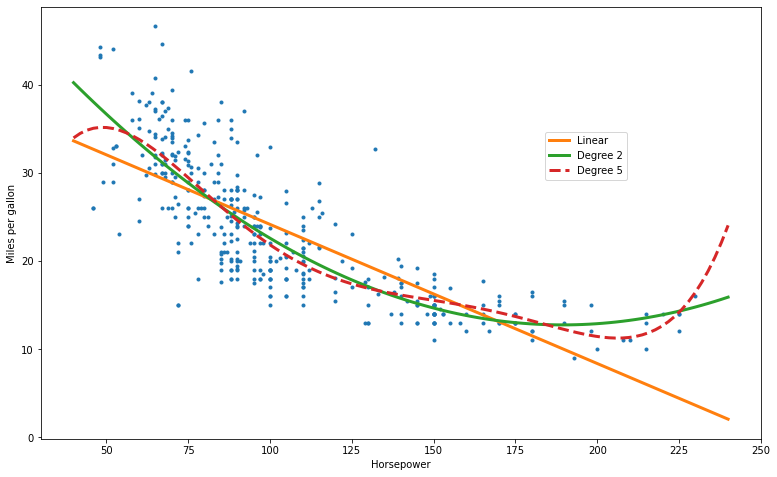

In [2]:
# Clean Data for Plot
auto = pd.read_csv('../data/Auto.csv')
auto['horsepower'] = auto['horsepower'].apply(lambda x:  np.nan if x == '?' else x )

auto['horsepower'] = pd.to_numeric(auto['horsepower'], downcast='float')
hp = auto.dropna()

# Fit and Plot
xp = np.linspace(40, 240, 100)

z = np.polyfit(hp['horsepower'], hp['mpg'], 1)
z2 = np.polyfit(hp['horsepower'], hp['mpg'], 2)
z5 = np.polyfit(hp['horsepower'], hp['mpg'], 5)

p = np.poly1d(z)
p2 = np.poly1d(z2)
p5 = np.poly1d(z5)

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per gallon')

ax.plot(hp['horsepower'], hp['mpg'], '.')
ax.plot(xp, p(xp), label='Linear', lw=3)
ax.plot(xp, p2(xp), label='Degree 2', lw=3)
ax.plot(xp, p5(xp), '--', label='Degree 5', lw=3)

ax.legend(loc=(0.7,0.6))
plt.show()

The points in the figure seem to have a quadratic shape, suggesting that a model of the form

\begin{equation}\label{3.36}
    \text{mpg} = \beta_0 + \beta_1 \times \text{horsepower} + \beta_2 \times \text{horsepower}^2 + \epsilon
    \tag{3.36}
\end{equation}

may provide a better fit. Equation \ref{3.36} involves predicting *mpg* using a non-linear function of *horsepower*. **But it is still a linear model!** That is, (\ref{3.36}) is simply a multiple linear regression model with $X_1 = \text{horsepower}$ and $X_2 = \text{horsepower}^2$.

The green curve in the figure shows the resulting quadratic fit to the data. The quadratic fit appears to be substantially better than the fit obtained when just the linear term is included. The $R^2$ of the quadratic fit is $0.688$, compared to $0.606$ for the linear fit, and the p-value in the table for the quadratic term is highly significant.

|                    | Coefficient | Std. error | t-statistic | p-value  |
|--------------------|-------------|------------|-------------|----------|
| **Intercept**      | 56.9001     | 1.8004     | 31.6        | < 0.0001 |
| **horsepower**     | −0.4662     | 0.0311     | -15.0       | < 0.0001 |
| **horsepower^2**   | 0.0012      | 0.0001     | 10.1        | < 0.0001 |


But if including $\text{horsepower}^2$ led to such a big improvement in the model, why not include $\text{horsepower}^3$, $\text{horsepower}^4$, or even $\text{horsepower}^5$? It turns out the resulting fit from including all polynomials up to $\text{horsepower}^5$ is too flexible, as shown in the red line in the figure. Here, it is obvious that the quadratic polynomial ($\text{horsepower}^2$) is the best fit.

## Potential Problems
Most common problems when fiting a linear regression model to a data set are:

1. Non-linearity of the response-predictor relationships.
2. Correlation of error terms.
3. Non-constant variance of error terms.
4. Outliers.
5. High-leverage points.
6. Collinearity.


### 1. Non-linearity of the Data
Residual plots are a useful graphical tool for identifying non-linearity. Given a simple linear regression model, we can plot the residuals, $e_i = y_i − \hat{y}_i$, versus the predictor $x_i$. In the case of a multiple regression model, since there are multiple predictors, we instead plot the residuals versus the predicted (or fitted) values $\hat{y}_i$. **Ideally, the residual plot will show no discernible pattern.**

If the residual plot indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as $\log{X}, \sqrt{X}$, and $X^2$, in the regression model.

### 2. Correlation of Error Terms
An important assumption of the linear regression model is that the error terms, $\epsilon_1 , \epsilon_2, . . . , \epsilon_n$, are uncorrelated. If in fact there is correlation among the error terms, then the estimated standard errors will tend to underestimate the true standard errors and we may have an unwarranted sense of confidence in our model.

Why might correlations among the error terms occur? Such correlations frequently occur in the context of *time series* data, which consists of observations for which measurements are obtained at discrete points in time. In many cases, observations that are obtained at adjacent time points will have positively correlated errors. If the error terms are positively correlated, then we may see **tracking** in the residuals—that is, **adjacent residuals may have similar values.**

Many methods have been developed to properly take account of correlations in the error terms in time series data. Correlation among the error terms can also occur outside of time series data. In general, the assumption of uncorrelated errors is extremely important for linear regression as well as for other statistical methods, and good experimental design is crucial in order to mitigate the risk of such correlations.

### 3. Non-constant Variance of Error Terms
Another important assumption of the linear regression model is that the error terms have a constant variance, $\text{Var}(\epsilon_i ) = \sigma^2$. The standard errors, confidence intervals, and hypothesis tests associated with the linear model rely upon this assumption.

One can identify non-constant variances in the errors, or **heteroscedasticity**, from the presence of a funnel shape in the residual plot. When faced with this problem, one possible solution is to transform the response $Y$ using a concave function such as $\log{Y}$ or $\sqrt{Y}$.

Sometimes we have a good idea of the variance of each response. For example, the $i$th response could be an average of $n_i$ raw observations. If each of these raw observations is uncorrelated with variance $\sigma^2$ , then their average has variance $\sigma_i^2 = \sigma^2 / n_i$. In this case a simple remedy is to fit our model by weighted least squares, with weights proportional to the inverse variances—i.e. $w_i = n_i$ in this case.

### 4. Outliers
An *outlier* is a point for which $y_i$ is far from the value predicted by the outlier model. It is typical for an outlier that does not have an unusual predictor value to have little effect on the least squares fit. However, even if an outlier does not have much effect on the least squares fit, it can cause other problems.

One such problem is in the way it affects the $\text{RSE}$ and the $R^2$ statistic. Since the RSE is used to compute all confidence intervals and  p-values, such a dramatic increase caused by a single data point can have implications for the interpretation of the fit.

Residual plots can be used to identify outliers but in practice, it can be difficult to decide how large a residual needs to be before we consider the point to be an outlier. To address this problem, instead of plotting the residuals, we can plot the **studentized residuals**, computed by dividing each residual $e_i$ by its estimated standard error. Observations whose studentized residuals are greater than 3 in absolute value are possible outliers.

If we believe that an outlier has occurred due to an error in data collection or recording, then one solution is to simply remove the observation. However, care should be taken, since an outlier may instead indicate a deficiency with the model, such as a missing predictor.

### 5. High-leverage points
We just saw that outliers are observations for which the response $y_i$ is unusual given the predictor $x_i$. In contrast, observations with *high leverage* have an unusual value for $x_i$. High leverage observations tend to have a sizable impact on the estimated regression line.

In a simple linear regression, high leverage observations are fairly easy to
identify, since we can simply look for observations for which the predictor
value is outside of the normal range of the observations. But in a multiple
linear regression with many predictors, it is possible to have an observation
that is well within the range of each individual predictor’s values, but that
is unusual in terms of the full set of predictors.

In order to quantify an observation’s leverage, we compute the **leverage statistic**. A large value of this statistic indicates an observation with high leverage. For a simple linear regression,

\begin{equation}\label{3.37}
    h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{ \sum_{i^{\prime} = 1}^n(x_{i^{\prime}} - \bar{x})^2 }.
    \tag{3.37}
\end{equation}

The leverage statistic $h_i$ is always between $1/n$ and $1$, and *the average leverage for all the observations is always equal to* $(p + 1)/n$. So if a given observation has a leverage statistic that greatly exceeds $(p+ 1)/n$, then we may suspect that the corresponding point has high leverage.


### 6. Collinearity
*Collinearity* refers to the situation in which two or more predictor variables are closely related to one another. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. In other words, since a credit card limit and credit rating tend to increase or decrease together, it can be difficult to determine how each one separately is associated with the response, balance.

Graphing contour plots for the RSS values as a function of the parameters $\beta$ for various regressions can sometimes identify whether two predictors are highly collinear. We might expect a number of concentric ellipsis about the optimal RSS value for two parameters that are not collinear. If two parameters are highly collinear, then we might still see ellipsises, except these will have very high eccentricity, resulting in more pairs of parameters with a similar value for RSS.

Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat{\beta}_j$ to grow. Recall that the t-statistic for each predictor is calculated by dividing $\hat{\beta}_j$ by its standard error. Consequently, collinearity results in a decline in the t-statistic. As a
result, in the presence of collinearity, we may fail to reject $H_0: \beta_j = 0$. This means that the *power* of the hypothesis test—the probability of correctly detecting a *non-zero* coefficient—is reduced by collinearity.

A simple way to detect collinearity is to look at the correlation matrix of the predictors. Unfortunately, not all collinearity problems can be detected by inspection of the correlation matrix: it is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation **multicollinearity**.

Instead of inspecting the correlation matrix, a better way to assess multicollinearity is to compute the **variance inflation factor** (VIF). The VIF is the ratio of the variance of $\hat{\beta}_j$ when fitting the full model divided by the variance of $\hat{\beta}_j$ if fit on its own. The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. The VIF for each variable can be computed using the formula

\begin{align*}
    \text{VIF}(\hat{\beta}_j) = \frac{1}{ 1 - R^2_{ X_j | X_{-j} } },
\end{align*}

where $R^2_{ X_j | X_{-j} }$ is the $R^2$ from a regression of $X_j$ onto all of the other predictors. If $R^2_{ X_j | X_{-j} }$ is close to one, then collinearity is present, and so the VIF will be large.

When faced with the problem of collinearity, there are two simple solutions:

The first is to drop one of the problematic variables from the regression. This can usually be done without much compromise to the regression fit, since the presence of collinearity implies that the information that this variable provides about the response is redundant in the presence of the other variables. The second solution is to combine the collinear variables together into a single predictor. For instance, we might take the average of standardized versions of credit limit and credit rating in order to create a new variable that measures credit worthiness.

---

# Comparison of Linear Regression with K-Nearest Neighbors
Linear regression is an example of a parametric approach because it assumes a linear functional form for $f(X)$. Parametric methods have several advantages. They are often easy to fit, because one need estimate only a small number of coefficients with sometimes simple interpretations, and tests of statistical significance can be easily performed. But parametric methods do have a disadvantage: by construction, they make strong assumptions about the
form of $f(X)$.

In contrast, non-parametric methods do not explicitly assume a parametric form for $f(X)$, and thereby provide an alternative and more flexible approach for performing regression. The **K-nearest neighbors regression** (KNN) regression method is closely related to the KNN classifier.

Given a value for $K$ and a prediction point $x_0$, KNN regression first identifies the $K$ training observations that are closest to $x_0$, represented by $N_0$ . It then estimates $f(x_0)$ using the average of all the training responses in $N_0$.

\begin{align*}
    \hat{f}(x_0) = \frac{1}{K} \sum_{x_i \in N_0} y_i
\end{align*}

In general, the optimal value for $K$ will depend on the *bias-variance tradeoff*, which we introduced in Chapter 2. A small value for K provides the most flexible fit, which will have low bias but high variance. In contrast, larger values of $K$ provide a smoother and less variable fit; the prediction in a region is an average of several points, and so changing one observation has a smaller effect. In Chapter 5, we introduce several approaches for estimating test error rates. These methods can be used to identify the optimal value of $K$ in KNN regression.

In what setting will a parametric approach such as least squares linear regression outperform a non-parametric approach such as KNN regression? The answer is simple: **the parametric approach will outperform the non-parametric approach if the parametric form that has been selected is close to the true form of $f$**.

It seems obvious that linear regression is going to be better than a non-parametric approach on data with a truly linear relationship: a non-parametric approach incurs a cost in variance that is not offset by a reduction in bias. But what about a non-linear relationship?

In a slight non-linear relationship we might still see that the test MSE for linear regression is still superior
to that of KNN for low values of $K$, while KNN regression doesn't become competitive until larger values of $K$.

In a highly non-linear relationship, we can start to expect that KNN substantially outperforms linear regression for all values of $K$. As the extent of non-linearity increases, there is little change in the test set MSE for the non-parametric KNN method, but there is a large increase in the test set MSE of linear regression.

In a real life situation in which the true relationship is unknown, one might draw the conclusion that KNN should be favored over linear regression because it will at worst be slightly inferior than linear regression if the true relationship is linear, and may give substantially better results if the true relationship is non-linear. *But in reality, even when the true relationship is highly non-linear, KNN may still provide inferior results to linear regression.* This is especially so in the case of a response with many predictors.

This decrease in performance as the dimension increases is a common problem for KNN, and results from the fact that in higher dimensions there is effectively a reduction in sample size. 100 training observations; when $p = 1$ may provide enough information to accurately estimate $f(X)$. However, spreading 100 observations over $p = 20$ dimensions results in a phenomenon in which a given observation has no "nearby neighbors"—this is the so-called **curse of dimensionality**. That is, the $K$ observations that are nearest to a given test observation $x_0$ may be very far away from $x_0$ in p-dimensional space when $p$ is large, leading to a very poor prediction of $f(x_0)$ and hence a poor KNN fit. As a general rule, **parametric methods will tend to outperform non-parametric approaches
when there is a small number of observations per predictor**.

Even in problems in which the dimension is small, we might prefer linear regression to KNN from an interpretability standpoint. If the test MSE of KNN is only slightly lower than that of linear regression, we might be willing to forego a little bit of prediction accuracy for the sake of a simple model that can be described in terms of just a few coefficients, and for which p-values are available.

---

# End Chapter